Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).

Evaluasi KMeans:


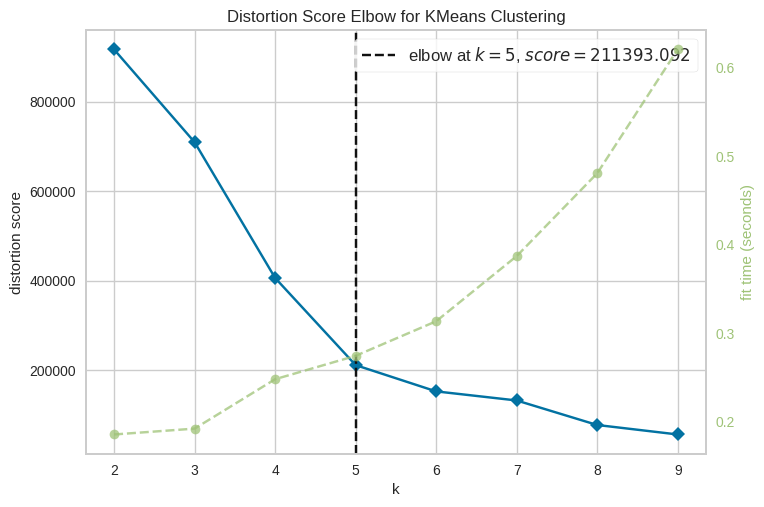

Optimal cluster untuk KMeans: 5


In [ ]:
# Langkah 1: Instal pustaka yang diperlukan
!pip install pandas openpyxl yellowbrick scikit-learn

# Langkah 2: Sambungkan Google Colab dengan Google Drive
from google.colab import drive
drive.mount('drive')

# Langkah 3: Baca file dari Google Drive
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Ganti 'path_to_your_file' dengan path yang sesuai di Google Drive Anda
file_path = 'drive/MyDrive/Online Retail.xlsx'
data = pd.read_excel(file_path)

# Prasyarat: Bersihkan data jika diperlukan
# (contoh sederhana, hanya mempertahankan kolom numerik)
data = data.select_dtypes(include=['float64', 'int64']).dropna()

# Normalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Fungsi untuk visualisasi Knee (Elbow) dan hitung nilai Silhouette dan DB Index
def evaluate_clustering(data, model, model_name):
    # Knee (Elbow) Method
    elbow_visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion')
    elbow_visualizer.fit(data)
    elbow_visualizer.poof()  # tampilkan visualisasi elbow

    # Tentukan jumlah klaster optimal berdasarkan Knee
    optimal_clusters = elbow_visualizer.elbow_value_
    print(f'Optimal cluster untuk {model_name}: {optimal_clusters}')

    # Model clustering dengan optimal clusters (hanya untuk KMeans dan Agglomerative)
    if model_name != "DBSCAN":
        model.set_params(n_clusters=optimal_clusters)

    # Fitting model
    labels = model.fit_predict(data)

    # Evaluasi matriks Silhouette dan Davies-Bouldin
    silhouette_avg = silhouette_score(data, labels)
    db_index = davies_bouldin_score(data, labels)

    print(f"Silhouette Score untuk {model_name}: {silhouette_avg}")
    print(f"Davies-Bouldin Index untuk {model_name}: {db_index}")

    return {
        'model': model_name,
        'optimal_clusters': optimal_clusters,
        'silhouette': silhouette_avg,
        'davies_bouldin': db_index
    }

# List model clustering yang akan digunakan
models = [
    (KMeans(), "KMeans"),
    (AgglomerativeClustering(), "Agglomerative Clustering"),
    (DBSCAN(), "DBSCAN")
]

# Evaluasi tiap model
results = []
for model, model_name in models:
    print(f"\nEvaluasi {model_name}:")
    result = evaluate_clustering(data_scaled, model, model_name)
    results.append(result)

# Menyusun hasil evaluasi ke dalam DataFrame
df_results = pd.DataFrame(results)
print("\nHasil Evaluasi:")
print(df_results)

# Kesimpulan: Model terbaik berdasarkan Silhouette Score dan Davies-Bouldin Index
best_model = df_results.loc[df_results['silhouette'].idxmax()]
print("\nModel terbaik berdasarkan Silhouette Score:")
print(best_model)

best_db_model = df_results.loc[df_results['davies_bouldin'].idxmin()]
print("\nModel terbaik berdasarkan Davies-Bouldin Index:")
print(best_db_model)
